**This notebook is the effort to answer StackOverflow Questions**

# Imports

In [2]:
from swtloc import SWTLocalizer
from swtloc.utils import imgshowN, imgshow,auto_canny
from cv2 import cv2
import numpy as np

# Raw Datapaths and Variable Initialisation

In [3]:
rawimage_path = 'so_material/'
swtl = SWTLocalizer()

# Q1
https://stackoverflow.com/questions/40443988/python-opencv-ocr-image-segmentation

In [12]:
imgpath = rawimage_path+'so1_img1.jpg'
swtl.swttransform(imgpaths=imgpath, text_mode = 'lb_df', gs_blurr=False ,
                  minrsw = 3, maxrsw = 10, max_angledev = np.pi/3)

MainProcess @  |                COMPLETE                 | -> STATUS: 0.0% 1/1 Images Done. Transformations Complete



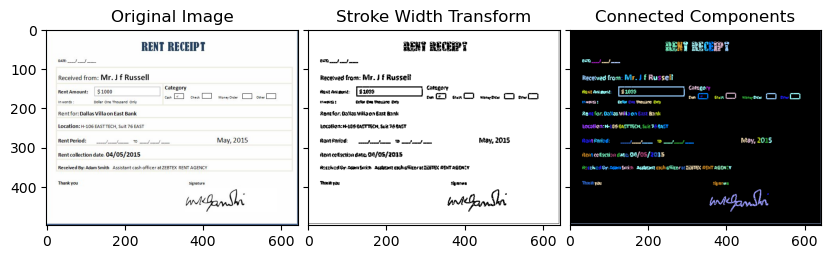

In [13]:
# Plotting three variants of the images during the process of the
# transformation -> Original > Stroke Width Transform > Connected Components
imgshowN([swtl.orig_img, swtl.swt_mat, swtl.swt_labelled3C],
         ['Original Image', 'Stroke Width Transform', 'Connected Components'])

In [14]:
respacket = swtl.get_grouped(lookup_radii_multiplier=.8, sw_ratio=2,
                     cl_deviat=[13,13,13], ht_ratio=2, 
                     ar_ratio=4, ang_deviat=30)

grouped_labels = respacket[0]
grouped_bubblebbox = respacket[1]
grouped_annot_bubble = respacket[2]
grouped_annot = respacket[3]
maskviz = respacket[4]
maskcomb  = respacket[5]


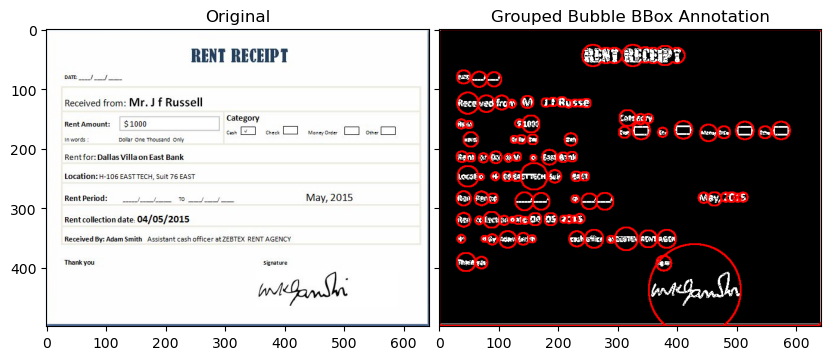

In [15]:
imgshowN([swtl.orig_img, grouped_annot_bubble],
         ['Original', 'Grouped Bubble BBox Annotation'])